_I will use these two resources_:
- https://stats.stackexchange.com/questions/41443/how-to-actually-plot-a-sample-tree-from-randomforestgettree
- https://stats.stackexchange.com/questions/41443/how-to-actually-plot-a-sample-tree-from-randomforestgettree


In [2]:
library(party)
library(randomForest)
library(readr)
library(dplyr)
library(tictoc)

In [3]:
df <- as.data.frame(read_csv('credit_train.csv'))

Parsed with column specification:
cols(
  `Loan ID` = col_character(),
  `Customer ID` = col_character(),
  `Loan Status` = col_character(),
  `Current Loan Amount` = col_integer(),
  Term = col_character(),
  `Credit Score` = col_integer(),
  `Annual Income` = col_integer(),
  `Years in current job` = col_character(),
  `Home Ownership` = col_character(),
  Purpose = col_character(),
  `Monthly Debt` = col_double(),
  `Years of Credit History` = col_double(),
  `Months since last delinquent` = col_integer(),
  `Number of Open Accounts` = col_integer(),
  `Number of Credit Problems` = col_integer(),
  `Current Credit Balance` = col_integer(),
  `Maximum Open Credit` = col_integer(),
  Bankruptcies = col_integer(),
  `Tax Liens` = col_integer()
)


In [4]:
sapply(df,class)
# There are a ton of NAs

Loan ID                  Customer ID 
                 "character"                  "character" 
                 Loan Status          Current Loan Amount 
                 "character"                    "integer" 
                        Term                 Credit Score 
                 "character"                    "integer" 
               Annual Income         Years in current job 
                   "integer"                  "character" 
              Home Ownership                      Purpose 
                 "character"                  "character" 
                Monthly Debt      Years of Credit History 
                   "numeric"                    "numeric" 
Months since last delinquent      Number of Open Accounts 
                   "integer"                    "integer" 
   Number of Credit Problems       Current Credit Balance 
                   "integer"                    "integer" 
         Maximum Open Credit                 Bankruptcies 
                   "integer"                    "integer" 
                   Tax Liens 
                   "integer"

In [5]:
df <- na.omit(df)

In [6]:
head(df,2)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
3,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999,Short Term,741,2231892,8 years,Own Home,Debt Consolidation,29200.53,14.9,29,18,1,297996,750090,0,0
7,273581de-85d8-4332-81a5-19b04ce68666,90a75dde-34d5-419c-90dc-1e58b04b3e35,Fully Paid,217646,Short Term,730,1184194,< 1 year,Home Mortgage,Debt Consolidation,10855.08,19.6,10,13,1,122170,272052,1,0


In [7]:
df <- select(df,-`Loan ID`,-`Customer ID`) 

In [8]:
library(caret)
dummy <- dummyVars("~ .", data = df,fullRank = TRUE, sep=".")
# Don't know 

Loading required package: lattice
Loading required package: ggplot2

Attaching package: 'ggplot2'

The following object is masked from 'package:randomForest':

    margin



In [9]:
features <- as.data.frame(predict(dummy, df))

In [10]:
head(features,3)

,`Loan Status`Fully Paid,`Current Loan Amount`,TermShort Term,`Credit Score`,`Annual Income`,`Years in current job`1 year,`Years in current job`10+ years,`Years in current job`2 years,`Years in current job`3 years,`Years in current job`4 years,...,Purposewedding,`Monthly Debt`,`Years of Credit History`,`Months since last delinquent`,`Number of Open Accounts`,`Number of Credit Problems`,`Current Credit Balance`,`Maximum Open Credit`,Bankruptcies,`Tax Liens`
3,1,99999999,1,741,2231892,0,0,0,0,0,...,0,29200.53,14.9,29,18,1,297996,750090,0,0
7,1,217646,1,730,1184194,0,0,0,0,0,...,0,10855.08,19.6,10,13,1,122170,272052,1,0
9,1,548746,1,678,2559110,0,0,1,0,0,...,0,18660.28,22.6,33,4,0,437171,555038,0,0


In [11]:
colnames(features) <- gsub("`", "", colnames(features))
colnames(features) <- gsub(" ", ".", colnames(features))
colnames(features) <- gsub("\\+", "plus", colnames(features))
colnames(features) <- gsub("\\/", "", colnames(features))
# In R, use \\ to grab special character
head(features,1)

,Loan.StatusFully.Paid,Current.Loan.Amount,TermShort.Term,Credit.Score,Annual.Income,Years.in.current.job1.year,Years.in.current.job10plus.years,Years.in.current.job2.years,Years.in.current.job3.years,Years.in.current.job4.years,...,Purposewedding,Monthly.Debt,Years.of.Credit.History,Months.since.last.delinquent,Number.of.Open.Accounts,Number.of.Credit.Problems,Current.Credit.Balance,Maximum.Open.Credit,Bankruptcies,Tax.Liens
3,1,1e+08,1,741,2231892,0,0,0,0,0,...,0,29200.53,14.9,29,18,1,297996,750090,0,0


In [12]:
colnames(features)

[1] "Loan.StatusFully.Paid"            "Current.Loan.Amount"             
 [3] "TermShort.Term"                   "Credit.Score"                    
 [5] "Annual.Income"                    "Years.in.current.job1.year"      
 [7] "Years.in.current.job10plus.years" "Years.in.current.job2.years"     
 [9] "Years.in.current.job3.years"      "Years.in.current.job4.years"     
[11] "Years.in.current.job5.years"      "Years.in.current.job6.years"     
[13] "Years.in.current.job7.years"      "Years.in.current.job8.years"     
[15] "Years.in.current.job9.years"      "Years.in.current.jobna"          
[17] "Home.OwnershipHome.Mortgage"      "Home.OwnershipOwn.Home"          
[19] "Home.OwnershipRent"               "PurposeBuy.a.Car"                
[21] "PurposeBuy.House"                 "PurposeDebt.Consolidation"       
[23] "PurposeEducational.Expenses"      "PurposeHome.Improvements"        
[25] "Purposemajor_purchase"            "PurposeMedical.Bills"            
[27] "Purposemoving"                    "Purposeother"                    
[29] "PurposeOther"                     "Purposerenewable_energy"         
[31] "Purposesmall_business"            "PurposeTake.a.Trip"              
[33] "Purposevacation"                  "Purposewedding"                  
[35] "Monthly.Debt"                     "Years.of.Credit.History"         
[37] "Months.since.last.delinquent"     "Number.of.Open.Accounts"         
[39] "Number.of.Credit.Problems"        "Current.Credit.Balance"          
[41] "Maximum.Open.Credit"              "Bankruptcies"                    
[43] "Tax.Liens"

In [13]:
set.seed(100)
train <- sample(nrow(features), 0.75*nrow(features), replace = FALSE)
TrainSet <- features[train,]
ValidSet <- features[-train,]

In [14]:
labels <- as.factor(features$Loan.StatusFully.Paid)
features <- select(features, -Loan.StatusFully.Paid)

In [15]:
nrow(TrainSet)
nrow(ValidSet)

[1] 28507

[1] 9503

In [16]:
tic()
    random_forest = rf <- randomForest(features,labels, ntree=20, importance=TRUE)
toc()

37.02 sec elapsed


In [17]:
print(rf)


Call:
 randomForest(x = features, y = labels, ntree = 20, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 20
No. of variables tried at each split: 6

        OOB estimate of  error rate: 16.29%
Confusion matrix:
     0     1 class.error
0 2654  5237  0.66366747
1  956 29159  0.03174498


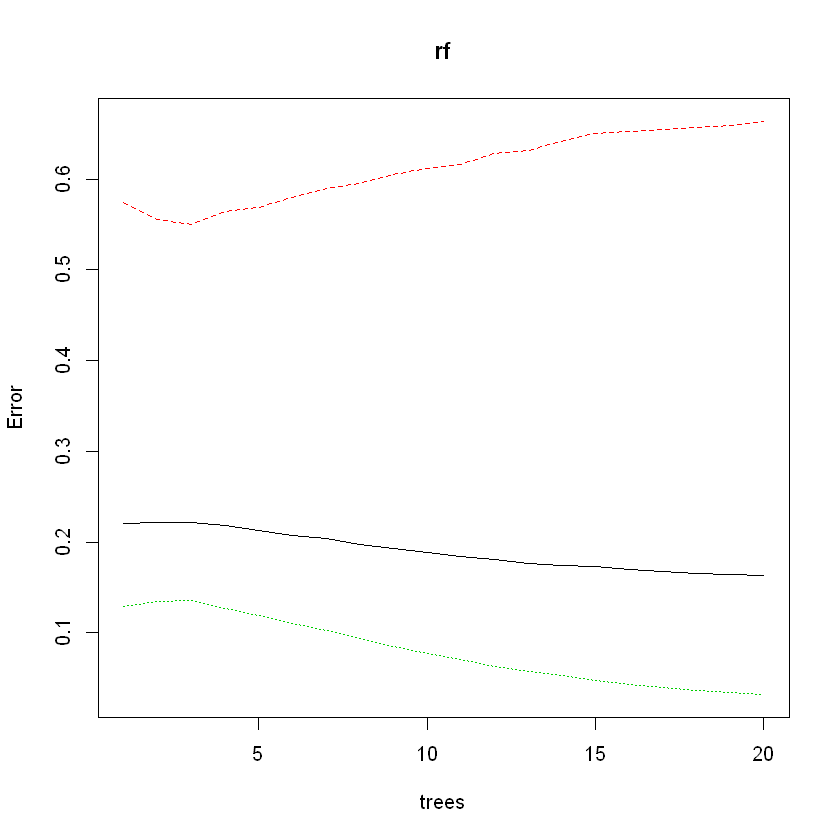

In [18]:
plot(rf)
# Have to find a way to do this in Python

In [19]:
# Predicting on train set
predTrain <- predict(rf, TrainSet, type = "class")
# Checking classification accuracy
table(predTrain, TrainSet$Loan.StatusFully.Paid)  

         
predTrain     0     1
        0  5478     0
        1   443 22586

In [20]:
# Checking classification accuracy
predValid <- predict(rf, ValidSet, type = "class")
mean(predValid == ValidSet$Loan.StatusFully.Paid)                    
table(predValid,ValidSet$Loan.StatusFully.Paid)

[1] 0.9826371

         
predValid    0    1
        0 1805    0
        1  165 7533

,0,1,MeanDecreaseAccuracy,MeanDecreaseGini
Current.Loan.Amount,11.3815383923,12.8944656,14.2428881,1207.622527
TermShort.Term,-0.8589845413,15.8675813,16.6804878,118.837345
Credit.Score,57.7545050045,33.4059115,46.3913785,3241.111649
Annual.Income,0.4416296032,25.5273433,26.0830603,914.505168
Years.in.current.job1.year,-1.4879541846,5.4508396,4.5526452,59.029126
Years.in.current.job10plus.years,2.0235788115,8.5862087,8.4929888,101.449034
Years.in.current.job2.years,0.0881341491,4.9902036,3.9961631,73.016293
Years.in.current.job3.years,-0.3152689647,6.2059618,5.0430341,61.560762
Years.in.current.job4.years,-0.1165002296,4.5157190,4.1487085,52.766077
Years.in.current.job5.years,-0.9647015813,4.4380400,3.7924499,57.478545


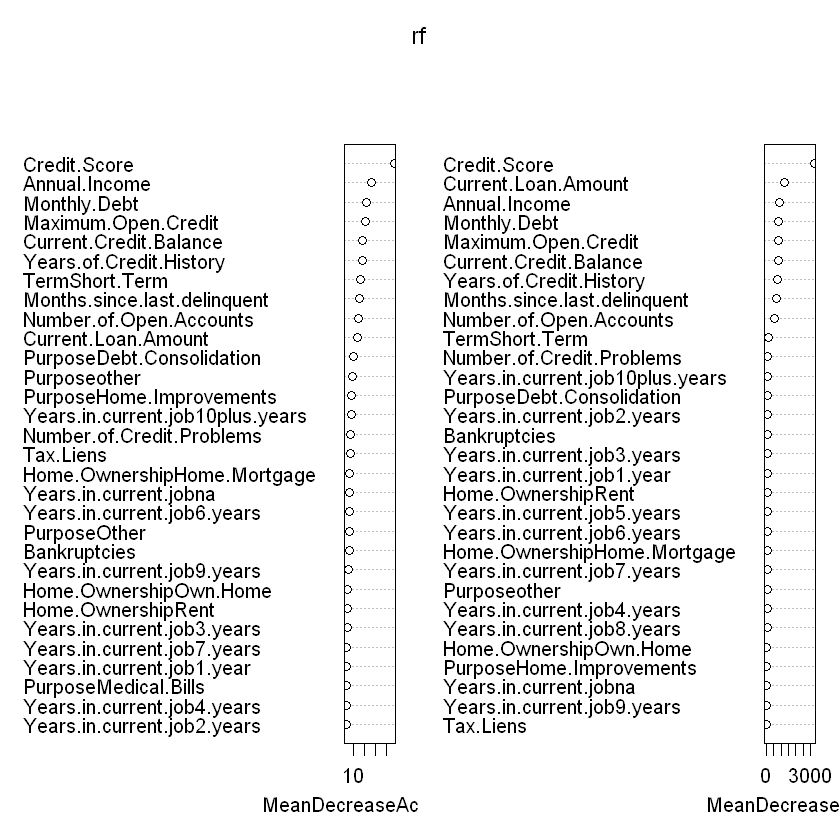

In [21]:
importance(rf)        
varImpPlot(rf)        


In [22]:
library(party)

In [23]:
# reprtree:::plot.getTree(rf)

In [24]:
getTree(rf)

,left daughter,right daughter,split var,split point,status,prediction
1,2,3,1,50394547.500,1,0
2,4,5,18,0.500,1,0
3,0,0,0,0.000,-1,2
4,6,7,1,346269.000,1,0
5,8,9,28,0.500,1,0
6,10,11,1,174394.000,1,0
7,12,13,4,1924852.000,1,0
8,14,15,4,1157670.000,1,0
9,16,17,13,0.500,1,0
10,18,19,19,0.500,1,0


In [25]:
help(getTree)